In [ ]:
# default_exp extract_patch_coords

In [ ]:
# export
from grade_classif.imports import *
from openslide import OpenSlide
from skimage.filters import threshold_otsu
from argparse import ArgumentParser
import csv
from fastai.data.transforms import get_files

In [ ]:
# export
parser = ArgumentParser()
parser.add_argument('-f')
parser.add_argument('--infolder', type=Path)
parser.add_argument('--size', type=int, default=299)
parser.add_argument('--level', type=int, default=0)
parser.add_argument('--overlap', type=float, default=0)
parser.add_argument('--outfile', type=Path)

_StoreAction(option_strings=['--outfile'], dest='outfile', nargs=None, const=None, default=None, type=<class 'pathlib.Path'>, choices=None, help=None, metavar=None)

In [ ]:
# export
args = parser.parse_args()

In [ ]:
# export
overlap_size = args.overlap * args.size

In [ ]:
# export
files = get_files(args.infolder, extensions=['.mrxs', '.svs'])

In [ ]:
# export
with args.outfile.open("w") as f:
    writer = csv.DictWriter(f, ["Slidename", "X", "Y"])
    writer.writeheader()
    for file in files:
        print(file.stem)
        slide = OpenSlide(str(file))
        dsr = int(slide.level_downsamples[args.level])
        w, h = slide.dimensions
        thumb_w = int((w / dsr - overlap_size) / (args.size - overlap_size))
        thumb_h = int((h / dsr - overlap_size) / (args.size - overlap_size))
        thumb = slide.get_thumbnail((thumb_w, thumb_h))
        thumb = np.array(thumb.convert("L"))
        thr = threshold_otsu(thumb[thumb > 0])
        for y, x in np.argwhere((thumb > 0) & (thumb < thr)):
            x = x * (args.size - overlap_size) * dsr
            y = y * (args.size - overlap_size) * dsr
            writer.writerow({"Slidename": file.stem, "X": x, "Y": y})


In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script('_extract_patch_coords.ipynb')

Converted _extract_patch_coords.ipynb.


In [ ]:
df = pd.read_csv('/home/DeepLearning/media/Isilon_robin/MILTest/coords_test.csv')

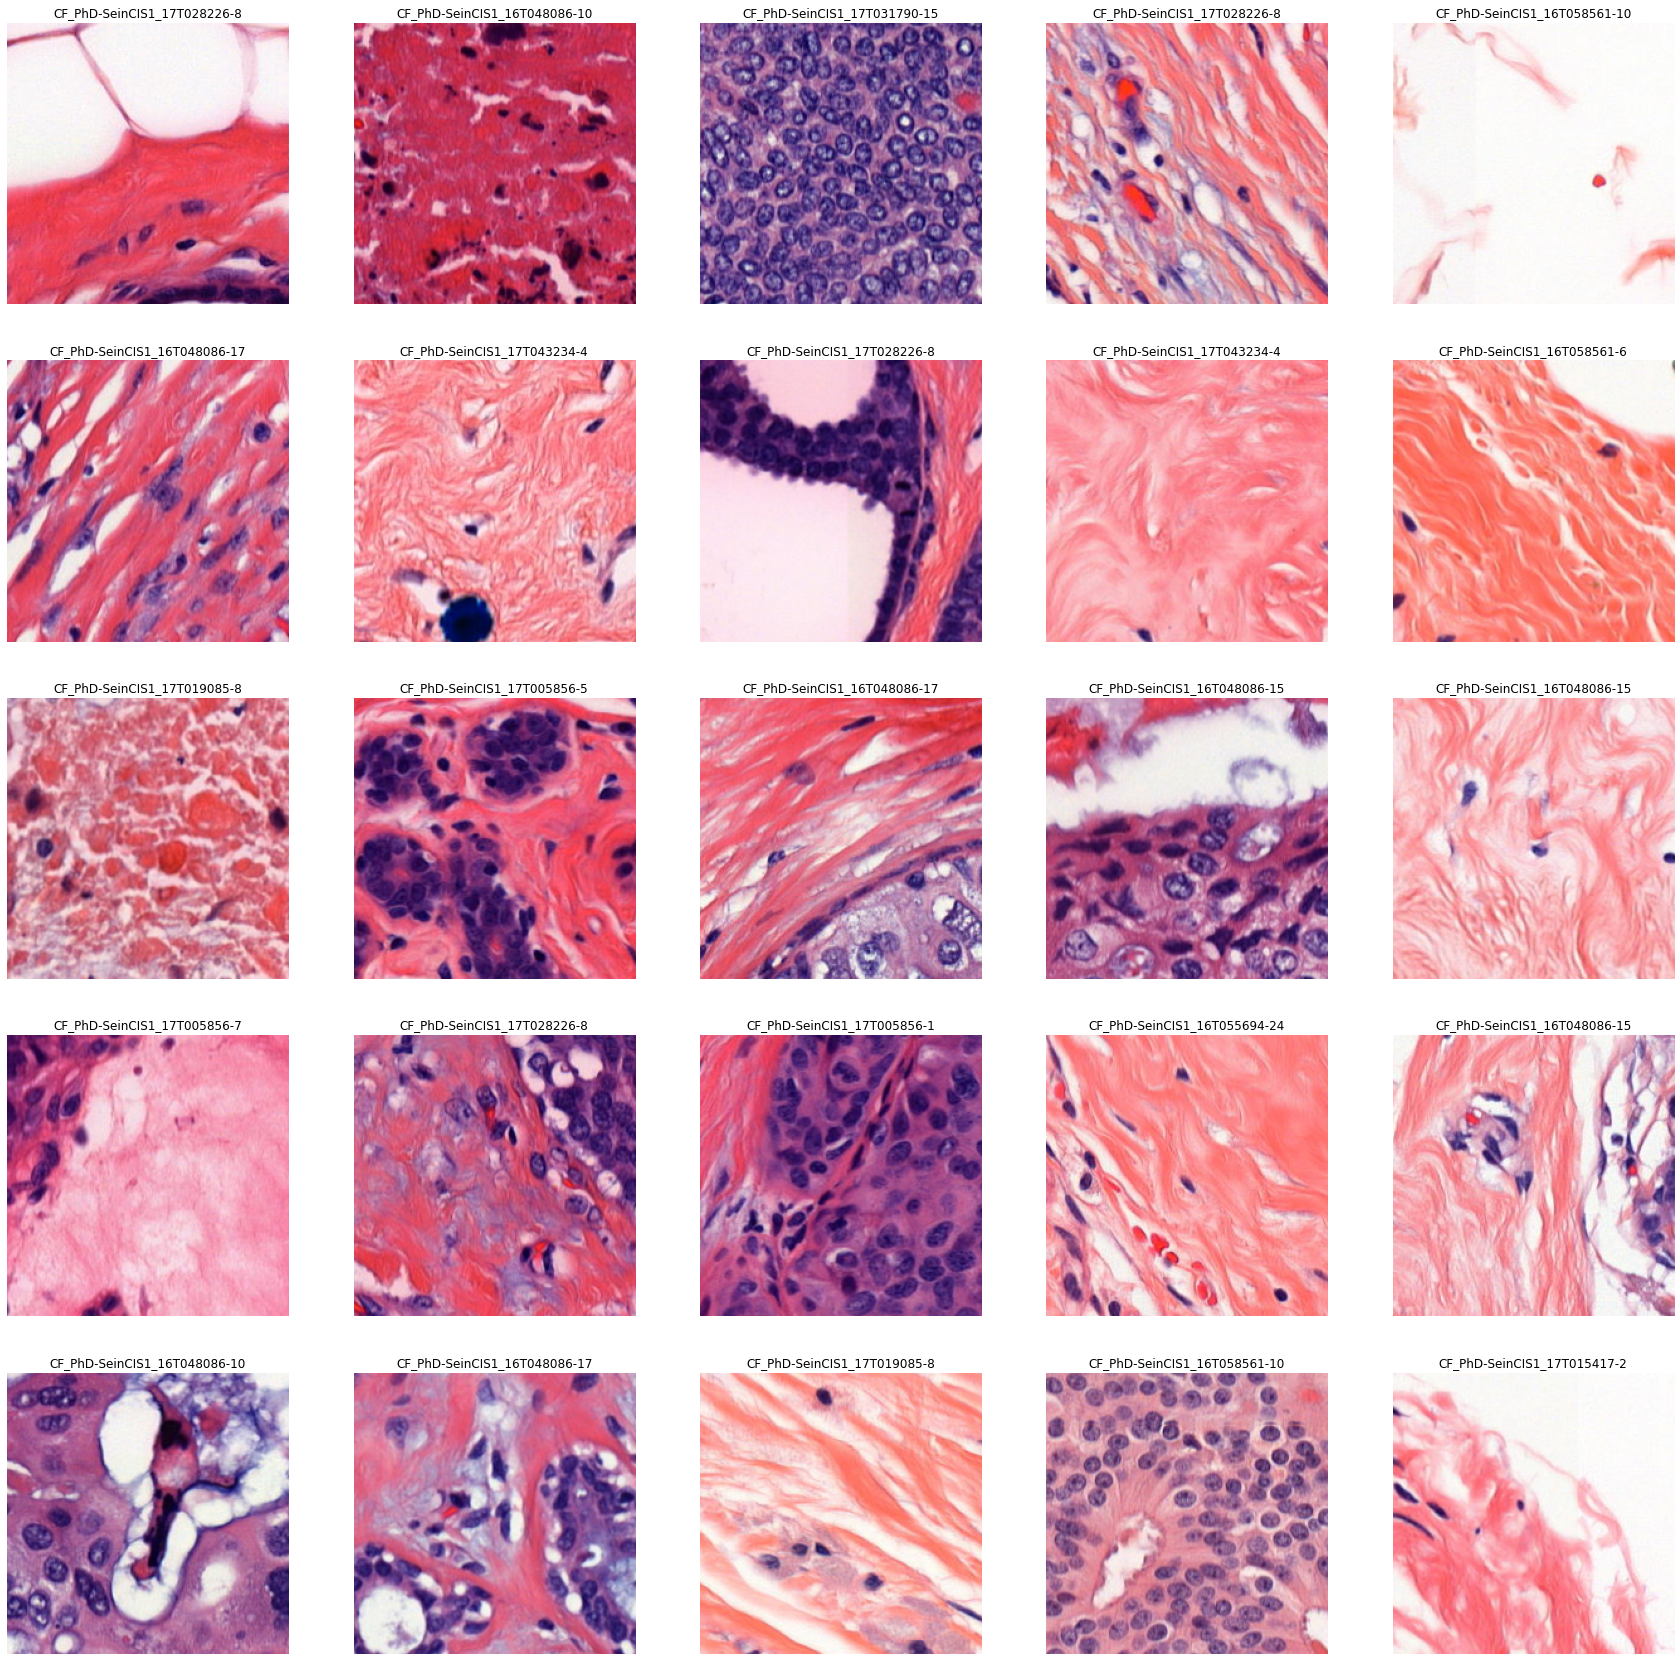

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 30))
for ax in axs.flatten():
    k = np.random.randint(df.shape[0])
    line = df.iloc[k]
    ax.set_title(line['Slidename'])
    slide = OpenSlide(f'/home/DeepLearning/media/Isilon_robin/MILTest/None/{line["Slidename"]}.mrxs')
    patch = slide.read_region((line['X'], line['Y']), 1, (224, 224))
    ax.imshow(patch)
    ax.axis('off')